In [ ]:
!pip install torch torchvision
!pip install Pillow
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import clip
from PIL import Image
import requests
from io import BytesIO

In [2]:
def get_caption_from_file(image_path, candidate_file, model_name="ViT-B/32"):
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load the CLIP model and its preprocessing function.
    model, preprocess = clip.load(model_name, device=device)

    # Load and preprocess the image.
    image = Image.open(image_path)
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Read candidate captions from file (one caption per line).
    with open(candidate_file, "r", encoding="utf-8") as f:
        candidate_captions = [line.strip() for line in f if line.strip()]

    # Tokenize the candidate captions.
    text_inputs = clip.tokenize(candidate_captions).to(device)

    # Compute the image and text features.
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Normalize the features to get cosine similarity as the dot product.
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity between the image and each candidate caption.
    similarities = (image_features @ text_features.T).squeeze(0)

    # Select the caption with the highest similarity.
    best_caption_index = torch.argmax(similarities).item()
    best_caption = candidate_captions[best_caption_index]

    return best_caption

In [3]:
def chat():
    image_url = input("Please enter the image URL: ").strip()
    try:
        response = requests.get(image_url)
        response.raise_for_status()
        image_data = BytesIO(response.content)
        return image_data
    except Exception as e:
        print("Failed to retrieve the image. Error:", e)
        exit(1)

In [1]:
!pip install clip

  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-0.2.0-py3-none-any.whl size=6988 sha256=799fd197a6d67af89cdc6783c88f9c3e0fe02b9953b0e7567ebd35987192a52f
  Stored in directory: /root/.cache/pip/wheels/ab/a5/e8/c9fa20742edbccf2702dae8ee62053e6c460e961d45967b49c
Successfully built clip


In [2]:
if __name__ == "__main__":
  while(True):
    image_source = chat()
    candidate_file = "candidate_captions.txt"

    caption = get_caption_from_file(image_source, candidate_file)
    print("Selected Caption:", caption)

    print("Would you like to continue? (y/n)")
    choice = input().strip().lower()
    if choice != 'y':
        print("Bye 👋")
        break

NameError: name 'chat' is not defined

Enter image path (or URL): https://images.unsplash.com/photo-1583687534963-565854a3d6d8?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8Z2luZ2VyJTIwY2F0fGVufDB8fDB8fHww
Error: module 'clip' has no attribute 'load'
Would you like to continue? (y/n): y
Enter image path (or URL): 
Error: module 'clip' has no attribute 'load'
Would you like to continue? (y/n): n
Bye 👋

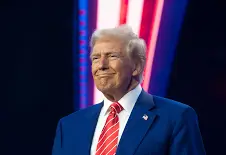

In [3]:
import torch
import clip
from PIL import Image
import requests
from io import BytesIO

def get_caption_from_file(image_path, candidate_file, model_name="ViT-B/32"):
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load the CLIP model and its preprocessing function.
    model, preprocess = clip.load(model_name, device=device)

    # Load and preprocess the image.
    image = Image.open(image_path)
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Read candidate captions from file (one caption per line).
    with open(candidate_file, "r", encoding="utf-8") as f:
        candidate_captions = [line.strip() for line in f if line.strip()]

    # Tokenize the candidate captions.
    text_inputs = clip.tokenize(candidate_captions).to(device)

    # Compute the image and text features.
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Normalize the features to get cosine similarity as the dot product.
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity between the image and each candidate caption.
    similarities = (image_features @ text_features.T).squeeze(0)

    # Select the caption with the highest similarity.
    best_caption_index = torch.argmax(similarities).item()
    best_caption = candidate_captions[best_caption_index]

    return best_caption

if __name__ == "__main__":
    while True:
        image_source = input("Enter image path (or URL): ").strip()

        if image_source.startswith("http"):
            response = requests.get(image_source)
            image_source = BytesIO(response.content)

        candidate_file = "candidate_captions.txt"

        try:
            caption = get_caption_from_file(image_source, candidate_file)
            print("Selected Caption:", caption)
        except Exception as e:
            print(f"Error: {e}")

        choice = input("Would you like to continue? (y/n): ").strip().lower()
        if choice != 'y':
            print("Bye 👋")
            break
